<h3 style="text-align: center;"><b>Implementing Polynomial Regression From Scratch</b></h3>
<h5 style="text-align: center;">This notebook follows the intuition from GeeksforGeeks <a href="https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/">https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/</a> as well as the tutorial from <a href="https://rickwierenga.com/blog/ml-fundamentals/polynomial-regression.html" target="_blank">https://rickwierenga.com/blog/ml-fundamentals/polynomial-regression.html</a></h5>
<h5 style="text-align: center;">We explored linear regression simply being y = &alpha;x + &beta;. However, this is only for linear relationships of data. There are relationships between dependent and independent variables that are non- linear so we can use polynomial regression. </h5>
$$ \text{The generel form of polynomial regression can be modeled like this: } h_\theta(x) = \theta^T = \theta_0 +\theta_1x + \theta_2x^2 + ... + \theta_nx^n $$
<h5 style="text-align: center;">To find the best coefficients we use:</h5>
$$ \vec{\theta} = (X^TX)^{-1}X^TY $$
<h5 style="text-align: center;">This is rather inefficient though so using gradient descent usually Mean Squared Error is the best course of action</h5>
<h5 style="text-align: center;">Gradient descent</h5>
$$ J(\theta) = \frac{1}{n} \sum_{i=1}^{n} (h_\theta(x^i) - y^i)^2 $$

<h5 style="text-align: center">The h_&theta;(x) can be implemented in code like:</h5>

In [259]:
import numpy as np
import matplotlib.pyplot as plt
def h(X, theta):
    return np.dot(X, theta)

<h5 style="text-align: center;">The Gradiant is Calculated as Before</h5>

10 1
(10,)


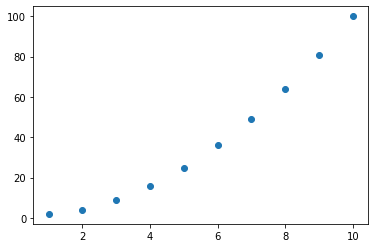

In [260]:
X = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]).T
y = np.array([2, 4, 9, 16, 25, 36, 49, 64, 81, 100])
m, n = X.shape
print(m, n)
print(y.shape)
plt.scatter(X, y)

In [261]:
ones = np.ones((m, 1))
ones

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [262]:
"""
This just adds the array of 1s to X
https://numpy.org/doc/stable/reference/generated/numpy.hstack.html
"""
X = np.hstack((ones, X))
print(X)
X.shape

[[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]]


(10, 2)

In [263]:
"""
For degree = 3 polynomials 
"""
print(X[:, 1]**2)
print((X[:, 1]**2).reshape((m, 1)))
X = np.hstack((
    X,
    (X[:, 1] ** 2).reshape((m, 1)),
    (X[:, 1] ** 3).reshape((m, 1)),
    (X[:, 1] ** 4).reshape((m, 1))
))
print(X.shape)
m, n = X.shape

[  1.   4.   9.  16.  25.  36.  49.  64.  81. 100.]
[[  1.]
 [  4.]
 [  9.]
 [ 16.]
 [ 25.]
 [ 36.]
 [ 49.]
 [ 64.]
 [ 81.]
 [100.]]
(10, 5)


In [276]:
def grad(x, Y, epochs=50):
    alpha = 0.01
    theta = np.random.random(n)
    for _ in range(epochs):
        theta = theta - alpha * (1/m) * np.dot(x.T, (np.dot(x, theta) - Y))
        #theta = theta - alpha * (1/m) * (x.T @ ((x @ theta) - Y))
        print(theta)
    return theta

In [277]:
theta = grad(X, y, 10)
prediction = h(X, theta)
print(prediction)
print(y)

[-1.77409493e+01 -1.58930561e+02 -1.42599864e+03 -1.30054424e+04
 -1.20474056e+05]
[3.09185130e+06 2.69373702e+07 2.41253614e+08 2.20425836e+09
 2.04451562e+10]
[-5.24696327e+11 -4.57135549e+12 -4.09415077e+13 -3.74069791e+14
 -3.46961011e+15]
[8.90426885e+16 7.75774028e+17 6.94790821e+18 6.34808711e+19
 5.88804222e+20]
[-1.51108364e+22 -1.31651398e+23 -1.17908282e+24 -1.07729122e+25
 -9.99220086e+25]
[2.56435853e+27 2.23416743e+28 2.00094224e+29 1.82819854e+30
 1.69570928e+31]
[-4.35180058e+32 -3.79145545e+33 -3.39566465e+34 -3.10251293e+35
 -2.87767429e+36]
[7.38514839e+37 6.43422432e+38 5.76255435e+39 5.26506625e+40
 4.88350770e+41]
[-1.25328392e+43 -1.09190898e+44 -9.77924383e+44 -8.93499020e+45
 -8.28747283e+46]
[2.12686394e+48 1.85300537e+49 1.65956977e+50 1.51629716e+51
 1.40641134e+52]
[1.57670244e+52 2.37859206e+53 1.18168453e+54 3.70018760e+54
 8.98385169e+54 1.85606989e+55 3.42962898e+55 5.83937241e+55
 9.33936398e+55 1.42174214e+56]
[  2   4   9  16  25  36  49  64  81 100]